In [1]:
# Importation of pandas, matplotlib.pyplot, seaborn, os and save_file
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
#from library.sb_utils import save_file

In [2]:
# Loading the Canadian Disaster Dataset
disaster = pd.read_csv(r'C:\Users\laurence\OneDrive\Data Science\Capstone 2\CanadianDisaster.csv',sep=";")
# Loading the Operating and financial statistics for major Canadian airlines dataset
airline = pd.read_csv(r'C:\Users\laurence\OneDrive\Data Science\Capstone 2\23100002.csv')

C:\Users\laurence\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Disaster dataset

In [3]:
disaster.info

<bound method DataFrame.info of                                         EVENT CATEGORY EVENT GROUP  \
0                                             Disaster     Natural   
1    The most severe flooding took place in Quebec ...         NaN   
2    States of emergency extended across the 3 prov...           1   
3                                             Disaster     Natural   
4                                             Disaster     Natural   
..                                                 ...         ...   
258                                           Disaster     Natural   
259                                           Disaster     Natural   
260                                           Disaster     Natural   
261                                           Disaster     Natural   
262                                           Disaster     Natural   

                    EVENT SUBGROUP                       EVENT TYPE  \
0    Meteorological - Hydrological                      

In [4]:
disaster.head()

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,EVENT START DATE,COMMENTS,FATALITIES,INJURED / INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY - PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Flood,Eastern Canada,4/18/2019 12:00:00 AM,Extensive flooding in April and May was experi...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The most severe flooding took place in Quebec ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,States of emergency extended across the 3 prov...,1,NaN,10000,0,NaN,4/18/2019 12:00:00 AM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Disaster,Natural,Meteorological - Hydrological,Flood,"Kashechewan, Ontario",4/15/2019 12:00:00 AM,Seasonal flooding along the Albany River force...,NaN,NaN,2500.0,...,4/15/2019 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Eastern Canada,3/14/2019 12:00:00 AM,A significant low pressure system tracked thro...,NaN,NaN,NaN,...,3/14/2019 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,124000000.0,NaN,NaN,NaN


In [5]:
disaster.columns

Index(['EVENT CATEGORY', 'EVENT GROUP', 'EVENT SUBGROUP', 'EVENT TYPE',
       'PLACE', 'EVENT START DATE', 'COMMENTS', 'FATALITIES',
       'INJURED / INFECTED', 'EVACUATED', 'ESTIMATED TOTAL COST',
       'NORMALIZED TOTAL COST', 'EVENT END DATE', 'FEDERAL DFAA PAYMENTS',
       'PROVINCIAL DFAA PAYMENTS', 'PROVINCIAL DEPARTMENT PAYMENTS',
       'MUNICIPAL COSTS', 'OGD COSTS', 'INSURANCE PAYMENTS', 'NGO PAYMENTS',
       'UTILITY - PEOPLE AFFECTED', 'MAGNITUDE'],
      dtype='object')

# Priliminary comments on the disaster dataset:
- There is a lot of missing values;
- Data will have to be retrieved from text;
- Catastrophic events are recorded from april 13th 2000 to april 18th 2019.
- The "Event group" column should be droped as all events are labelled as "natural".
- Some rows should be replaced as they are in continuity with the previous "Comments" entry (e.g. rows 1 ans 2 are related to row 0 and should be rapatriated).
- Some data are misplaced when comments on events are distributed on multiple rows (e.g. from row 2, data in columns "Event group", "Event subgroup", "Event type" and "Place" instead should be in the columns "Fatalities", "Injured/Infected", "Evacuated" and "Event end date").
- In fact, the first column being something else then "Disaster" indicates that there is an expansion of the "Comments" data in on multiple rows, as previously described.
- The target columns are "Event type", "Event start date" and possibly "Event end date", "Place" and "Estimated total cost".
- The dataset need to be thorouhgly cleaned before any calculation can be attempted.

In [6]:
# Changing space for "_" in the column names.
disaster.columns = [c.replace(' ', '_') for c in disaster.columns]

In [7]:
# Getting rid of the problematic misplaced data related to the extended comments.
disaster = disaster[disaster.EVENT_CATEGORY == 'Disaster']

# Removing empty columns.
disaster = disaster.drop(["EVENT_GROUP", "PROVINCIAL_DFAA_PAYMENTS", "MUNICIPAL_COSTS", "OGD_COSTS", "NGO_PAYMENTS", "MAGNITUDE"], axis=1)

In [8]:
# Verifing datatypes of the airline dataset.
disaster.dtypes

EVENT_CATEGORY                     object
EVENT_SUBGROUP                     object
EVENT_TYPE                         object
PLACE                              object
EVENT_START_DATE                   object
COMMENTS                           object
FATALITIES                        float64
INJURED_/_INFECTED                float64
EVACUATED                         float64
ESTIMATED_TOTAL_COST              float64
NORMALIZED_TOTAL_COST             float64
EVENT_END_DATE                     object
FEDERAL_DFAA_PAYMENTS             float64
PROVINCIAL_DEPARTMENT_PAYMENTS    float64
INSURANCE_PAYMENTS                float64
UTILITY_-_PEOPLE_AFFECTED         float64
dtype: object

In [9]:
# Verifing missing values in the disaster dataset.
missing = pd.concat([disaster.isnull().sum(), 100 * disaster.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by="count", ascending=False)

# There is no missing value in the "EVENT_TYPE" column and only 2 in the "EVENT_START_DATE", the two main columns of interest.

,count,%
PROVINCIAL_DEPARTMENT_PAYMENTS,228,95.000000
INSURANCE_PAYMENTS,195,81.250000
FEDERAL_DFAA_PAYMENTS,183,76.250000
INJURED_/_INFECTED,94,39.166667
UTILITY_-_PEOPLE_AFFECTED,92,38.333333
FATALITIES,77,32.083333
EVACUATED,70,29.166667
NORMALIZED_TOTAL_COST,45,18.750000
ESTIMATED_TOTAL_COST,36,15.000000
EVENT_END_DATE,25,10.416667


In [10]:
# Dropping the 2 rows with missing values.
disaster = disaster[disaster['EVENT_START_DATE'].notna()]

In [11]:
# Applying datetime format to EVENT_START_DATE and extracting year and month
disaster["EVENT_START_DATE"] = pd.to_datetime(disaster["EVENT_START_DATE"])
disaster["year"] = pd.DatetimeIndex(disaster["EVENT_START_DATE"]).year
disaster["month"] = pd.DatetimeIndex(disaster["EVENT_START_DATE"]).month

In [12]:
# Isolating the timeframe of interest (between 04-2000 to 04-2019)
date_range = (disaster['EVENT_START_DATE'] > '2001-1-1') & (disaster['EVENT_START_DATE'] <= '2018-12-31')
disaster = disaster.loc[date_range]

In [13]:
# Counting event by type.
disaster.count()

EVENT_CATEGORY                    229
EVENT_SUBGROUP                    229
EVENT_TYPE                        229
PLACE                             229
EVENT_START_DATE                  229
COMMENTS                          229
FATALITIES                        158
INJURED_/_INFECTED                141
EVACUATED                         164
ESTIMATED_TOTAL_COST              196
NORMALIZED_TOTAL_COST             190
EVENT_END_DATE                    207
FEDERAL_DFAA_PAYMENTS              54
PROVINCIAL_DEPARTMENT_PAYMENTS     12
INSURANCE_PAYMENTS                 43
UTILITY_-_PEOPLE_AFFECTED         142
year                              229
month                             229
dtype: int64

In [14]:
# Counting event by year.
n = disaster.groupby('year').size()
n

year
2001     5
2002    11
2003     7
2004     6
2005    12
2006    16
2007    18
2008    26
2009    16
2010    17
2011    15
2012    14
2013     8
2014     6
2015    11
2016    24
2017     6
2018    11
dtype: int64

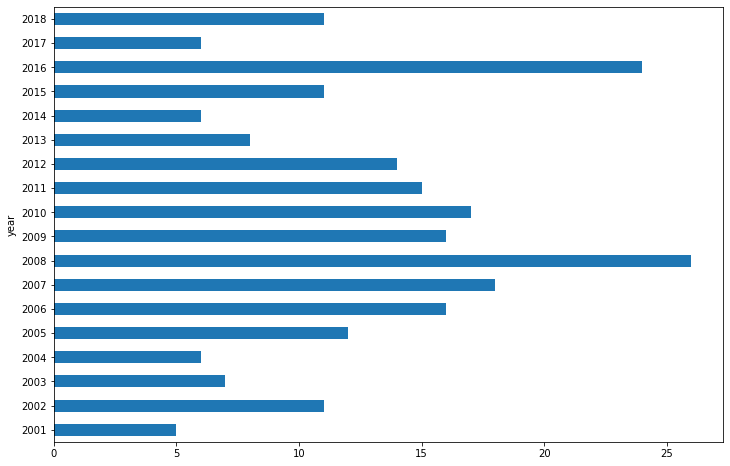

In [15]:
# Visualizing the amount of disaster per year.
yearly_n = n.plot.barh(y='year', figsize=(12,8))

In [16]:
# Verifing the range, mean and median of value, for all the airports, for itinerant and local movements.
print("The range of the value column is", n.max()-n.min(), "from", n.max(), "to", n.min())
print("The mean of the value column is", n.mean())
print("The median of the value column is", n.median())

The range of the value column is 21 from 26 to 5
The mean of the value column is 12.722222222222221
The median of the value column is 11.5


# Airline dataset

In [17]:
airline.info

<bound method DataFrame.info of        REF_DATE     GEO           DGUID                            Airports  \
0       1997-01  Canada  2016A000011124                 Total, all airports   
1       1997-01  Canada  2016A000011124                 Total, all airports   
2       1997-01  Canada  2016A000011124                 Total, all airports   
3       1997-01  Canada  2016A000011124                 Total, all airports   
4       1997-01  Canada  2016A000011124                 Total, all airports   
...         ...     ...             ...                                 ...   
444605  2022-02  Canada  2016A000011124  Yellowknife, Northwest Territories   
444606  2022-02  Canada  2016A000011124  Yellowknife, Northwest Territories   
444607  2022-02  Canada  2016A000011124  Yellowknife, Northwest Territories   
444608  2022-02  Canada  2016A000011124  Yellowknife, Northwest Territories   
444609  2022-02  Canada  2016A000011124  Yellowknife, Northwest Territories   

                   

In [18]:
airline.head()

,REF_DATE,GEO,DGUID,Airports,Class of operation,Peak hour and peak day of movements,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997-01,Canada,2016A000011124,"Total, all airports","Total, itinerant and local movements",Number of movements,Number,223,units,0,v41126217,1.1.1.2,295073,NaN,NaN,NaN,0
1,1997-01,Canada,2016A000011124,"Total, all airports",Itinerant movements,Number of movements,Number,223,units,0,v41126218,1.1.2.2,211864,NaN,NaN,NaN,0
2,1997-01,Canada,2016A000011124,"Total, all airports",Local movements,Number of movements,Number,223,units,0,v41126219,1.1.3.2,83209,NaN,NaN,NaN,0
3,1997-01,Canada,2016A000011124,"Total, all airports",Civil local movements,Number of movements,Number,223,units,0,v41126220,1.1.4.2,80377,NaN,NaN,NaN,0
4,1997-01,Canada,2016A000011124,"Total, all airports",Military local movements,Number of movements,Number,223,units,0,v41126221,1.1.5.2,2832,NaN,NaN,NaN,0


In [19]:
airline.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Airports', 'Class of operation',
       'Peak hour and peak day of movements', 'UOM', 'UOM_ID', 'SCALAR_FACTOR',
       'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL',
       'TERMINATED', 'DECIMALS'],
      dtype='object')

# Priliminary comments on the airline dataset:
- Data are recorded from january 1997 to february 2022 and should be reduce from 04-2000 to 04-2019 to match with the disaster dataset.
- Monthly "Total, all airports", combined with "Total, itinerant and local movements" is of prime interest to have a global idea of aerial movement.
- Monthly "Total, itinerant and local movements" for all provinces could also be observed for more details.
- "GEO", "DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED","DECIMALS", "SCALAR_ID" columns should be droped as they are affected by a lot of missing values and do not provide any insight for the question of interest.
- There is no missing values in the columns of interest.

In [20]:
# Changing space for "_" in the column names.
airline.columns = [c.replace(' ', '_') for c in airline.columns]

# Applying datetime format to REF_DATE
airline["REF_DATE"] = pd.to_datetime(airline["REF_DATE"])

In [21]:
# Removing unnecessary columns (affected by missing values or providing no insight)
airline = airline.drop(["GEO","DGUID", "UOM", "UOM_ID", "SCALAR_FACTOR", "VECTOR", "COORDINATE", "STATUS", "SYMBOL", "TERMINATED","DECIMALS", "SCALAR_ID"], axis=1)

In [22]:
# Verifing datatypes of the airline dataset.
airline.dtypes

REF_DATE                               datetime64[ns]
Airports                                       object
Class_of_operation                             object
Peak_hour_and_peak_day_of_movements            object
VALUE                                           int64
dtype: object

In [23]:
# Verifing missing values in the airline dataset.
missing = pd.concat([airline.isnull().sum(), 100 * airline.isnull().mean()], axis=1)
missing.columns=["count", "%"]
missing.sort_values(by="count", ascending=False)

,count,%
REF_DATE,0,0.0
Airports,0,0.0
Class_of_operation,0,0.0
Peak_hour_and_peak_day_of_movements,0,0.0
VALUE,0,0.0


In [24]:
# Isolating the timeframe of interest (between 04-2000 to 04-2019)
date_range = (airline['REF_DATE'] > '2001-1-1') & (airline['REF_DATE'] <= '2018-12-31')
airline = airline.loc[date_range]
airline["year"] = pd.DatetimeIndex(airline['REF_DATE']).year
airline["month"] = pd.DatetimeIndex(airline['REF_DATE']).month

In [25]:
# Isolating "total, all airports" from the Airports columns and "Total, itinerant and local movements" from the Class of operation columns.
airline_total = airline[airline.Airports == "Total, all airports"]
airline_total = airline_total[airline_total.Class_of_operation == "Total, itinerant and local movements"]

# Isolating data from provinces and territories and "Total, itinerant and local movements" from the Class of operation columns. 
airline_local = airline[airline.Airports != "Total, all airports"]
airline_local = airline_local[airline_local.Class_of_operation == "Total, itinerant and local movements"]
airline_local = airline_local[airline_local.Peak_hour_and_peak_day_of_movements == "Number of movements"]

In [26]:
# Resulting dataframe
airline_total

,REF_DATE,Airports,Class_of_operation,Peak_hour_and_peak_day_of_movements,VALUE,year,month
74935,2001-02-01,"Total, all airports","Total, itinerant and local movements",Number of movements,335254,2001,2
76445,2001-03-01,"Total, all airports","Total, itinerant and local movements",Number of movements,418483,2001,3
77955,2001-04-01,"Total, all airports","Total, itinerant and local movements",Number of movements,424343,2001,4
79465,2001-05-01,"Total, all airports","Total, itinerant and local movements",Number of movements,460960,2001,5
80975,2001-06-01,"Total, all airports","Total, itinerant and local movements",Number of movements,465684,2001,6
...,...,...,...,...,...,...,...
382585,2018-08-01,"Total, all airports","Total, itinerant and local movements",Number of movements,436955,2018,8
384025,2018-09-01,"Total, all airports","Total, itinerant and local movements",Number of movements,412189,2018,9
385465,2018-10-01,"Total, all airports","Total, itinerant and local movements",Number of movements,405096,2018,10
386905,2018-11-01,"Total, all airports","Total, itinerant and local movements",Number of movements,348431,2018,11


In [27]:
# Resulting local dataframe
airline_local

,REF_DATE,Airports,Class_of_operation,Peak_hour_and_peak_day_of_movements,VALUE,year,month
74941,2001-02-01,"Abbotsford, British Columbia","Total, itinerant and local movements",Number of movements,10500,2001,2
74976,2001-02-01,"Boundary Bay, British Columbia","Total, itinerant and local movements",Number of movements,17047,2001,2
75011,2001-02-01,"Calgary International, Alberta","Total, itinerant and local movements",Number of movements,17753,2001,2
75046,2001-02-01,"Calgary/Springbank, Alberta","Total, itinerant and local movements",Number of movements,10772,2001,2
75081,2001-02-01,"Chicoutimi/St-Honoré, Quebec","Total, itinerant and local movements",Number of movements,2198,2001,2
...,...,...,...,...,...,...,...
389611,2018-12-01,"Whitehorse International, Yukon","Total, itinerant and local movements",Number of movements,2155,2018,12
389646,2018-12-01,"Windsor, Ontario","Total, itinerant and local movements",Number of movements,3291,2018,12
389681,2018-12-01,Winnipeg/James Armstrong Richardson Internatio...,"Total, itinerant and local movements",Number of movements,8844,2018,12
389716,2018-12-01,"Winnipeg/St. Andrews, Manitoba","Total, itinerant and local movements",Number of movements,7231,2018,12


In [28]:
# Verifing if there us duplicated data (multiple entry for the same month; none)
airline_total.REF_DATE.is_unique

True

In [29]:
# Verifing the range, mean and median of value, for all the airports, for itinerant and local movements.
print("Total airports:")
print("The range of the value column is", airline_total.VALUE.max()-airline_total.VALUE.min(), "from", airline_total.VALUE.max(), "to", airline_total.VALUE.min())
print("The mean of the value column is", airline_total.VALUE.mean())
print("The median of the value column is", airline_total.VALUE.median())

Total airports:
The range of the value column is 248470 from 507708 to 259238
The mean of the value column is 380265.63720930234
The median of the value column is 390620.0


In [30]:
# Verifing the range, mean and median of value, for local airports, for itinerant and local movements.
print("Local airports:")
print("The range of the value column is", airline_local.VALUE.max()-airline_local.VALUE.min(), "from", airline_local.VALUE.max(), "to", airline_local.VALUE.min())
print("The mean of the value column is", airline_local.VALUE.mean())
print("The median of the value column is", airline_local.VALUE.median())

Local airports:
The range of the value column is 43580 from 43962 to 382
The mean of the value column is 9119.588622420524
The median of the value column is 7270.0


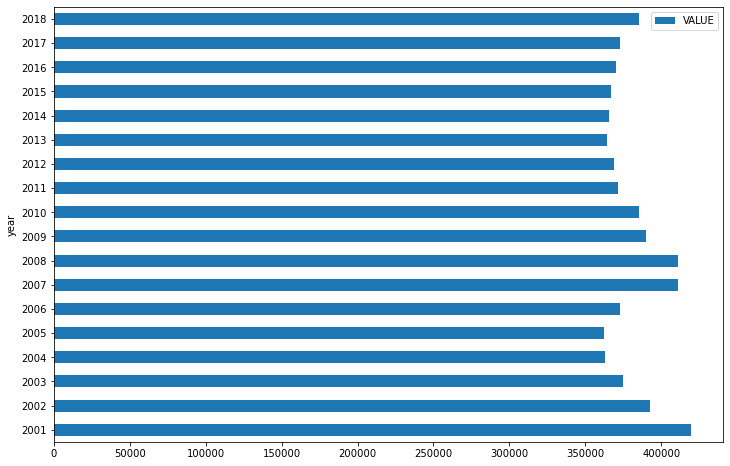

In [31]:
# Calculating the yearly mean of total deplacement by plane in Canada and visualization of the data.
year = round(airline_total.set_index(["year", "month"]).groupby('year').mean(),1)
yearly_total_value = year.plot.barh(y='VALUE', figsize=(12,8))

# Saving data

In [32]:
disaster.to_csv('disaster_cleaned.csv', index=False)
airline_total.to_csv('airline_total_cleaned.csv', index=False)
airline_local.to_csv('airline_local_cleaned.csv', index=False)